In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df_raw=pd.read_csv("TaxiFare.csv")
df_raw['date_time_of_pickup']=pd.to_datetime(df_raw['date_time_of_pickup'])


In [3]:
df_raw.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
print("shape of dataset:",df_raw.shape)

shape of dataset: (50000, 8)


In [5]:
#creating datatime  features based on pickup_datatime
import calendar

df_raw['pickup_date']=df_raw['date_time_of_pickup'].dt.date
df_raw['pickup_day']=df_raw['date_time_of_pickup'].apply(lambda x:x.day)
df_raw['pickup_hour']=df_raw['date_time_of_pickup'].apply(lambda x:x.hour)
df_raw['pickup_day_of_week']=df_raw['date_time_of_pickup'].apply(lambda x:calendar.day_name[x.weekday()])
df_raw['pickup_month']=df_raw['date_time_of_pickup'].apply(lambda x:x.month)
df_raw['pickup_year']=df_raw['date_time_of_pickup'].apply(lambda x:x.year)


df_raw.head()





,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [6]:
df_raw.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
pickup_date             0
pickup_day              0
pickup_hour             0
pickup_day_of_week      0
pickup_month            0
pickup_year             0
dtype: int64

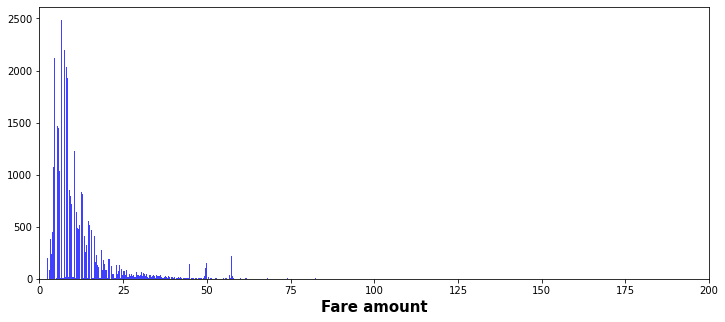

In [7]:
#visualization

plt.figure(figsize=(12,5))
n,bins,patches=plt.hist(df_raw.amount,1000,facecolor='blue',alpha=0.75)
plt.xlabel('Fare amount',fontsize=15,fontweight='bold')
plt.xlim(0,200)
plt.show();


C:\Users\UJJWAL~1\AppData\Local\Temp/ipykernel_7684/1555991915.py:2: RuntimeWarning: divide by zero encountered in log
  sns.kdeplot(np.log(df_raw['amount'].values)).set_title("Distribution of fare amount in log scale",fontsize=15,fontweight='bold');
C:\Users\UJJWAL~1\AppData\Local\Temp/ipykernel_7684/1555991915.py:2: RuntimeWarning: invalid value encountered in log
  sns.kdeplot(np.log(df_raw['amount'].values)).set_title("Distribution of fare amount in log scale",fontsize=15,fontweight='bold');


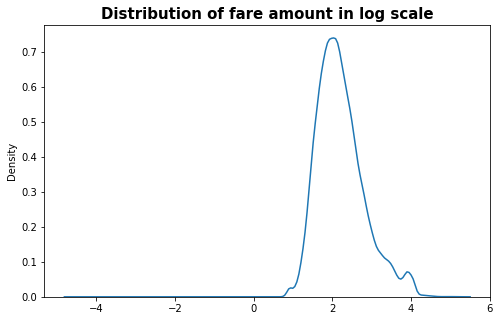

In [8]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(df_raw['amount'].values)).set_title("Distribution of fare amount in log scale",fontsize=15,fontweight='bold');

In [9]:
#analyzing top 5 fair amount 
df_raw['amount'].value_counts(normalize=True).iloc[:5]

amount
6.5    0.04936
4.5    0.04208
8.5    0.03858
6.1    0.02882
5.3    0.02880
Name: proportion, dtype: float64

Text(0, 0.5, 'counts')

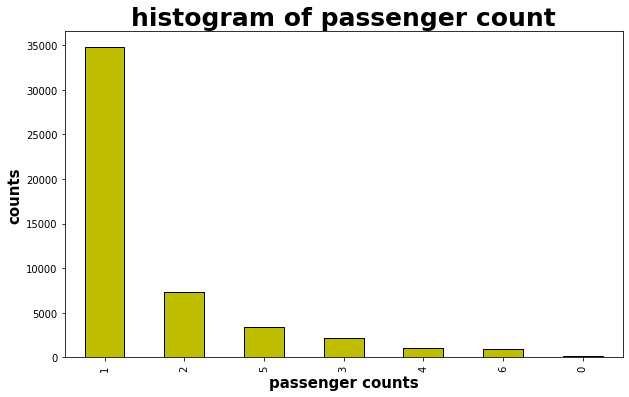

In [10]:
#passenger count
plt.figure(figsize=(10,6))
df_raw['no_of_passenger'].value_counts().plot.bar(color='y',edgecolor='k');
plt.title("histogram of passenger count",fontsize=25,fontweight='bold')
plt.xlabel('passenger counts',fontsize=15,fontweight='bold')
plt.ylabel('counts',fontsize=15,fontweight='bold')



In [11]:
#analyzing number of passengers
df_raw['no_of_passenger'].value_counts()

no_of_passenger
1    34808
2     7386
5     3453
3     2183
4     1016
6      989
0      165
Name: count, dtype: int64

In [12]:
#now we use Haversine Distance, in the Haversine distance we calculates the shortest distance between two points on a sphere using their latitudes and longitudes

def distance(lat1,lon1,lat2,lon2):
    p=0.01745329519943295#pi/180
    a=0.5-np.cos((lat2-lat1)*p)/2 + np.cos(lat1*p)*np.cos(lat2*p)*(1-np.cos((lon2-lon1)*p))/2
    return 0.6213712*12742 * np.arcsin(np.sqrt(a))


#add new column in dataframe with distance in miles
df_raw['distance_miles']=distance(df_raw.latitude_of_pickup,df_raw.longitude_of_pickup,\
                                  df_raw.latitude_of_dropoff,df_raw.longitude_of_dropoff)
df_raw.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640487
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250670
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863411
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739386
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242219


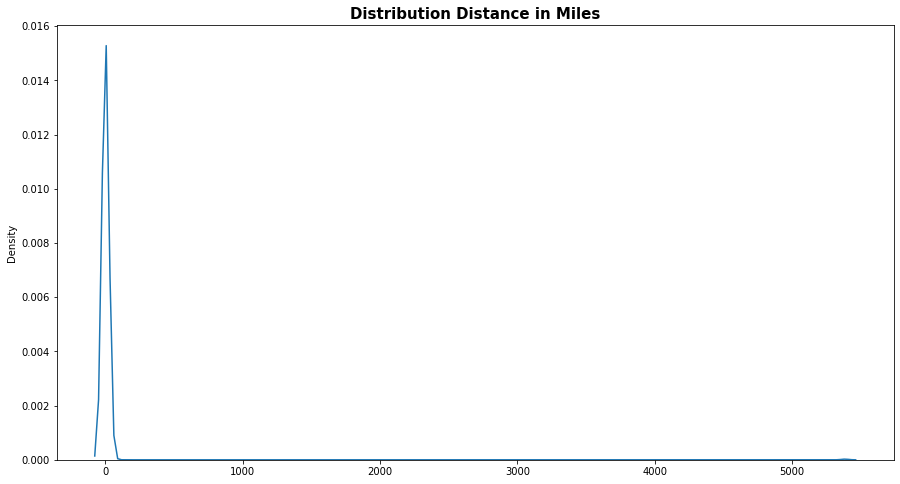

In [13]:
plt.figure(figsize=(15,8))
sns.kdeplot(df_raw['distance_miles'].values).set_title(
"Distribution Distance in Miles",fontsize=15,fontweight='bold');

In [14]:
df_final1=df_raw.copy()
df_final1.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640487
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250670
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863411
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739386
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242219


In [15]:
#imputing categorical varibles

# Define replacement values for 'pickup_year' and 'pickup_day_of_week'
year_replacement = {2009: 1, 2010: 2, 2011: 3, 2012: 4, 2013: 5,2014:6,2015:7}
day_of_week_replacement = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5,'Saturday':6,'Sunday':7}

# Replace values in the DataFrame using the replace method
df_final1['pickup_year'] = df_final1['pickup_year'].replace(year_replacement)
df_final1['pickup_day_of_week'] = df_final1['pickup_day_of_week'].replace(day_of_week_replacement)

df_final1.drop(['unique_id','date_time_of_pickup','pickup_date'],axis=1,inplace=True)
df_final1.head(10)



,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,1,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,3,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,4,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2,1.242219
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1,6,9,4,1,3,2.353282
6,7.5,-73.980002,40.751662,-73.973802,40.764842,1,20,20,2,11,4,0.966734
7,16.5,-73.951300,40.774138,-73.990095,40.751048,1,4,17,3,1,4,2.582074
8,9.0,-74.006462,40.726713,-73.993078,40.731628,1,3,13,1,12,4,0.778722
9,8.9,-73.980658,40.733873,-73.991540,40.758138,2,2,1,3,9,1,1.770676


In [16]:
from sklearn.model_selection import train_test_split
X=df_final1.drop(['amount'],axis=1)
y=df_final1[['amount']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35000, 11)
(15000, 11)
(35000, 1)
(15000, 1)


##linear regression model

In [18]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

from sklearn.metrics import mean_squared_error
print("test RMSE:%.3f"%mean_squared_error(y_test,y_pred)**0.5)

test RMSE:9.667


Random forest Regression

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(max_depth=5,random_state=0,n_estimators=200)
rf.fit(X_train,y_train)
y.pred=rf.predict(X_test)

print("test RMSE:%.3f"%mean_squared_error(y_test,y_pred)**0.5)


C:\New folder\python3.10\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


test RMSE:9.667


C:\Users\UJJWAL~1\AppData\Local\Temp/ipykernel_7684/3359641098.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  y.pred=rf.predict(X_test)


In [20]:
import pickle 

#save the trained model as a pickle string

pickle.dump(rf,open('rf','wb'))

In [21]:
print("enter your informamtion to predict fare")

pickup_Coordinates=str(input("Enter Pickup Coordinates:"))
Drop_off_Coordinates=str(input("Enter drop-off Coordinates:"))

pickup_latitude=float(pickup_Coordinates.split(',')[0])
pickup_longitude=float(pickup_Coordinates.split(',')[1])

dropoff_latitude=float(Drop_off_Coordinates.split(',')[0])
dropoff_longitude=float(Drop_off_Coordinates.split(',')[1])

Enter_Date=input("Enter Date (DD/MM/YYYY)")
pickup_hour=int(input('enter hour:'))
pickup_month=int(Enter_Date.split('/')[1])
pickup_day=int(Enter_Date.split('/')[0])
pickup_year=int(Enter_Date.split('/')[2])
pickup_day_of_week=int(input('enter week:'))

passenger_count=int(input('Enter number of passengers:'))

distance_miles=distance(pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude)

my_array=np.array([pickup_longitude,pickup_longitude,dropoff_latitude,dropoff_longitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles])

print('fare amount($):',rf.predict(my_array.reshape(1,-1)))



enter your informamtion to predict fare
Enter Pickup Coordinates:45.26,67.14
Enter drop-off Coordinates:56.15,71.35
Enter Date (DD/MM/YYYY)10/11/2012
enter hour:2
enter week:3
Enter number of passengers:4
fare amount($): [19.86643711]


C:\New folder\python3.10\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
